In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import folium

In [9]:
con = sqlite3.connect('boston_employee_data.db')

query = "select * from yearly_earnings"

wages = pd.read_sql_query(query, con)
avg_wage_22 = float(wages.average_earnings[wages.year == '2022'])
avg_wage_22

avg_wage_12 = float(wages.average_earnings[wages.year == '2012'])
avg_wage_12

avg_wage_17 = float(wages.average_earnings[wages.year == '2017'])
avg_wage_17

C:\Users\elhel\AppData\Local\Temp\ipykernel_9312\1717991990.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg_wage_22 = float(wages.average_earnings[wages.year == '2022'])
C:\Users\elhel\AppData\Local\Temp\ipykernel_9312\1717991990.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg_wage_12 = float(wages.average_earnings[wages.year == '2012'])
C:\Users\elhel\AppData\Local\Temp\ipykernel_9312\1717991990.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg_wage_17 = float(wages.average_earnings[wages.year == '2017'])


80418.24877372831

In [19]:
con2 = sqlite3.connect('boston_prop_data.db')

query2 = "select * from cleaned_prop_22 ORDER BY TOTAL_VALUE ASC"

prop_22 = pd.read_sql_query(query2, con2)
prop_22['ratio'] = (avg_wage_22 * 3) / prop_22['TOTAL_VALUE']
prop_22['ZIPCODE'] = prop_22['ZIPCODE'].astype(int)
prop_22['ZIPCODE'] = prop_22['ZIPCODE'].astype(str)

# Insert a zero at the beginning of each value
#prop_22['ZIPCODE'] = '0' + prop_22['ZIPCODE']


#prop_22

In [20]:
con3 = sqlite3.connect('boston_prop_data.db')

query3 = "select * from final_prop"

json_prop = pd.read_sql_query(query3, con3)
json_prop['ratio'] = (avg_wage_22 * 3) / prop_22['TOTAL_VALUE']
json_prop.to_json('zipcode_boston.geojson')
#json_prop

In [21]:
con3 = sqlite3.connect('boston_prop_data.db')

query3 = "select * from final_prop_22"

json_prop = pd.read_sql_query(query3, con3)

In [22]:
zips_22 = gpd.read_file("ZIP_Codes.geojson").to_crs(epsg=3857)
zips_22['ratio'] = json_prop['TOTAL_VALUE'] / (avg_wage_22)
zips_22

,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength,geometry,ratio
0,1,02134,3.721936e+07,40794.182396,"POLYGON ((-7917421.185 5215693.234, -7917425.8...",7.670765
1,2,02125,6.476052e+07,62224.521440,"POLYGON ((-7908739.375 5209608.204, -7908781.1...",5.992511
2,3,02110,6.637284e+06,18358.213496,"POLYGON ((-7909371.225 5215689.468, -7909371.0...",30.707326
3,4,02118,3.116158e+07,32353.407618,"POLYGON ((-7910713.849 5213084.154, -7910845.2...",4.509123
4,5,02126,6.078585e+07,45488.394711,"POLYGON ((-7914448.063 5204662.572, -7914473.4...",15.720127
5,6,02109,5.536731e+06,22538.305842,"POLYGON ((-7910119.201 5214575.581, -7910108.1...",13.225511
6,7,02021,2.361905e+03,432.194702,"POLYGON ((-7918245.394 5195177.421, -7918246.7...",9.929618
7,8,02113,2.807328e+06,8507.459971,"POLYGON ((-7910108.049 5215594.251, -7910092.5...",4.701533
8,9,02130,1.052212e+08,64225.022210,"POLYGON ((-7915701.976 5204311.437, -7915700.5...",4.869883
9,10,02121,4.890592e+07,35217.581923,"POLYGON ((-7912458.449 5208224.624, -7912519.2...",38.090835


"from folium.plugins import HeatMap\n\n# Load the GeoJSON file\ngeojson_data = 'boston_zipcodes.geojson'\n\n# Create a Folium map centered at a specific location\nm = folium.Map(location=[ 42.3601, -71.0589], zoom_start=10)\n\n# Add the heatmap layer to the map\nHeatMap(data=geojson_data).add_to(m)\n\n"

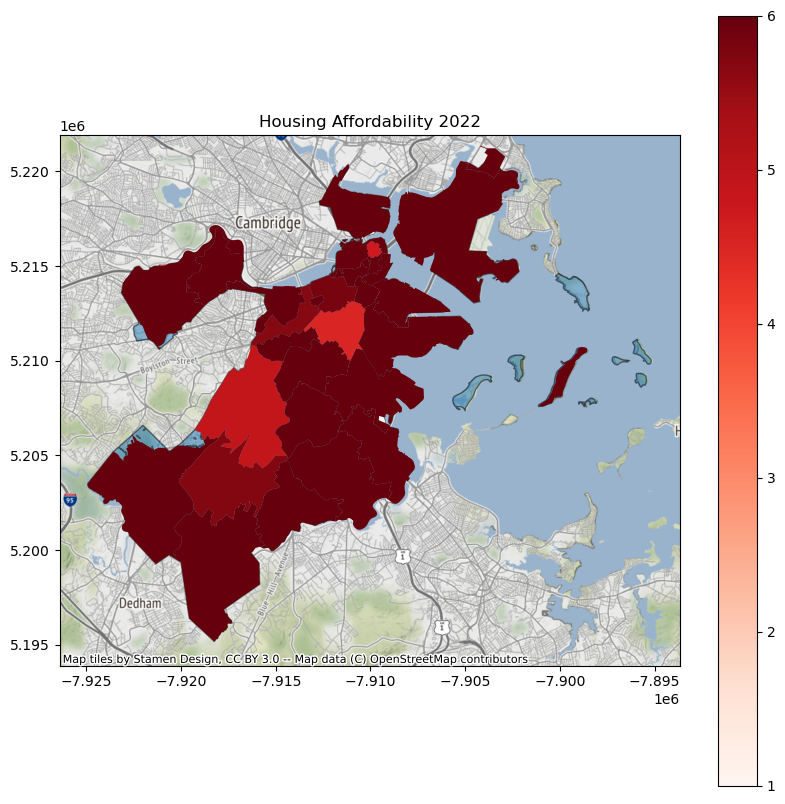

In [23]:
# 2022 NAN ZIPS: 02186, 02026, 02152
# 2012 NAN ZIPS: SAME W/ 151
bos = gpd.read_file("boston-Copy1.geojson")
bos = bos.to_crs(epsg=3857)

ax = bos.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# Sea rise
#zips = gpd.read_file("ZIP_Codes.geojson").to_crs(epsg=3857)

#reversed_cmap = plt.cm.get_cmap('Reds').reversed()

zips_22.plot(ax=ax, column='ratio', cmap='Reds', alpha=1, legend=True, vmin=1, vmax=6)

plt.title('Housing Affordability 2022')


'''from folium.plugins import HeatMap

# Load the GeoJSON file
geojson_data = 'boston_zipcodes.geojson'

# Create a Folium map centered at a specific location
m = folium.Map(location=[ 42.3601, -71.0589], zoom_start=10)

# Add the heatmap layer to the map
HeatMap(data=geojson_data).add_to(m)

'''

In [4]:
con3 = sqlite3.connect('boston_prop_data.db')

query3 = "select * from final_prop_12"

final_12 = pd.read_sql_query(query3, con3)
final_12

,ZIPCODE,AVG_TOTAL,ZIP5,ShapeSTArea,ShapeSTLength
0,2134.0,3.584886e+05,2134.0,3.721936e+07,40794.182396
1,2125.0,2.761851e+05,2125.0,6.476052e+07,62224.521440
2,2118.0,1.414425e+06,2118.0,3.116158e+07,32353.407618
3,2126.0,2.199154e+05,2126.0,6.078585e+07,45488.394711
4,2109.0,5.784975e+05,2109.0,5.536731e+06,22538.305842
5,2113.0,5.475704e+05,2113.0,2.807328e+06,8507.459971
6,2130.0,4.997950e+05,2130.0,1.052212e+08,64225.022210
7,2121.0,2.187841e+05,2121.0,4.890592e+07,35217.581923
8,2119.0,2.353027e+05,2119.0,4.451150e+07,37680.702099
9,2115.0,1.936336e+06,2115.0,1.977130e+07,34806.584022


In [7]:
zips_12 = gpd.read_file("ZIP_Codes.geojson").to_crs(epsg=3857)
zips_12['ratio'] =  final_12['AVG_TOTAL'] / (avg_wage_12)
#zips_12 = zips_12.drop(zips_12[zips_12['ratio'].isna()].index)
zips_12

,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength,geometry,ratio
0,1,02134,3.721936e+07,40794.182396,"POLYGON ((-7917421.185 5215693.234, -7917425.8...",4.798043
1,2,02125,6.476052e+07,62224.521440,"POLYGON ((-7908739.375 5209608.204, -7908781.1...",3.696485
2,3,02110,6.637284e+06,18358.213496,"POLYGON ((-7909371.225 5215689.468, -7909371.0...",18.930790
3,4,02118,3.116158e+07,32353.407618,"POLYGON ((-7910713.849 5213084.154, -7910845.2...",2.943367
4,5,02126,6.078585e+07,45488.394711,"POLYGON ((-7914448.063 5204662.572, -7914473.4...",7.742660
5,6,02109,5.536731e+06,22538.305842,"POLYGON ((-7910119.201 5214575.581, -7910108.1...",7.328729
6,7,02021,2.361905e+03,432.194702,"POLYGON ((-7918245.394 5195177.421, -7918246.7...",6.689299
7,8,02113,2.807328e+06,8507.459971,"POLYGON ((-7910108.049 5215594.251, -7910092.5...",2.928225
8,9,02130,1.052212e+08,64225.022210,"POLYGON ((-7915701.976 5204311.437, -7915700.5...",3.149312
9,10,02121,4.890592e+07,35217.581923,"POLYGON ((-7912458.449 5208224.624, -7912519.2...",25.916092


Text(0.5, 1.0, '2012')

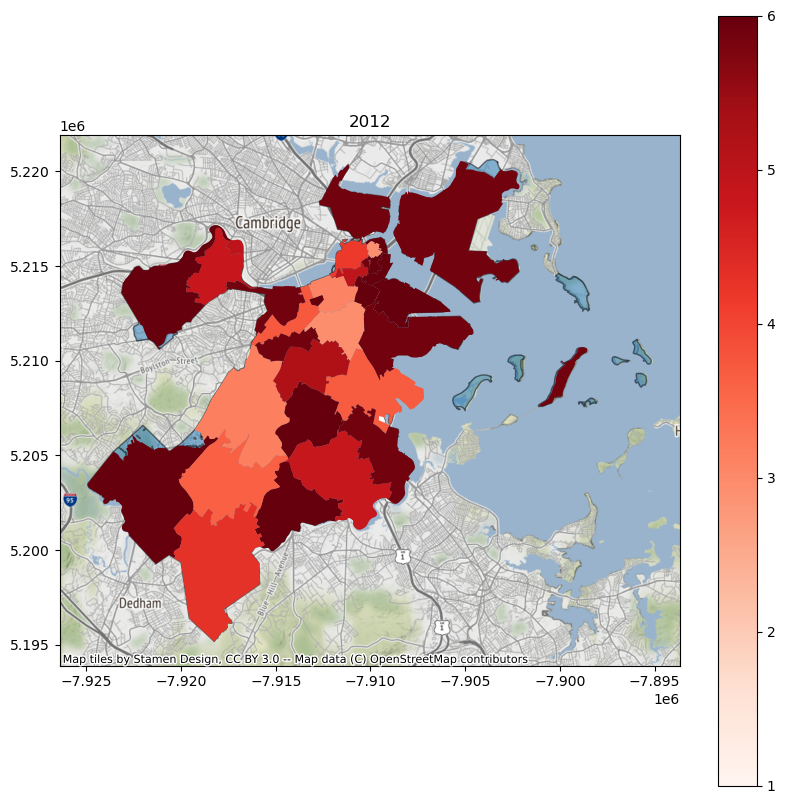

In [14]:


bos = gpd.read_file("boston-Copy1.geojson")
bos = bos.to_crs(epsg=3857)

ax = bos.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# Sea rise
#zips = gpd.read_file("ZIP_Codes.geojson").to_crs(epsg=3857)

#reversed_cmap = plt.cm.get_cmap('Reds').reversed()


zips_12.plot(ax=ax, column='ratio', cmap='Reds', alpha=1, legend=True, vmin=1, vmax=6)
plt.title('2012')

In [11]:
con3 = sqlite3.connect('boston_prop_data.db')

query3 = "select * from final_prop_17"

final_17 = pd.read_sql_query(query3, con3)
#final_17

In [10]:
zips_17 = gpd.read_file("ZIP_Codes.geojson").to_crs(epsg=3857)
zips_17['ratio'] =  final_17['AVG_TOTAL'] / (avg_wage_17)
#zips_12 = zips_12.drop(zips_12[zips_12['ratio'].isna()].index)
zips_17

,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength,geometry,ratio
0,1,02134,3.721936e+07,40794.182396,"POLYGON ((-7917421.185 5215693.234, -7917425.8...",6.588727
1,2,02125,6.476052e+07,62224.521440,"POLYGON ((-7908739.375 5209608.204, -7908781.1...",4.685113
2,3,02110,6.637284e+06,18358.213496,"POLYGON ((-7909371.225 5215689.468, -7909371.0...",29.388399
3,4,02118,3.116158e+07,32353.407618,"POLYGON ((-7910713.849 5213084.154, -7910845.2...",3.836326
4,5,02126,6.078585e+07,45488.394711,"POLYGON ((-7914448.063 5204662.572, -7914473.4...",15.874136
5,6,02109,5.536731e+06,22538.305842,"POLYGON ((-7910119.201 5214575.581, -7910108.1...",10.523080
6,7,02021,2.361905e+03,432.194702,"POLYGON ((-7918245.394 5195177.421, -7918246.7...",9.033641
7,8,02113,2.807328e+06,8507.459971,"POLYGON ((-7910108.049 5215594.251, -7910092.5...",3.820660
8,9,02130,1.052212e+08,64225.022210,"POLYGON ((-7915701.976 5204311.437, -7915700.5...",3.954309
9,10,02121,4.890592e+07,35217.581923,"POLYGON ((-7912458.449 5208224.624, -7912519.2...",36.164294


Text(0.5, 1.0, '2017')

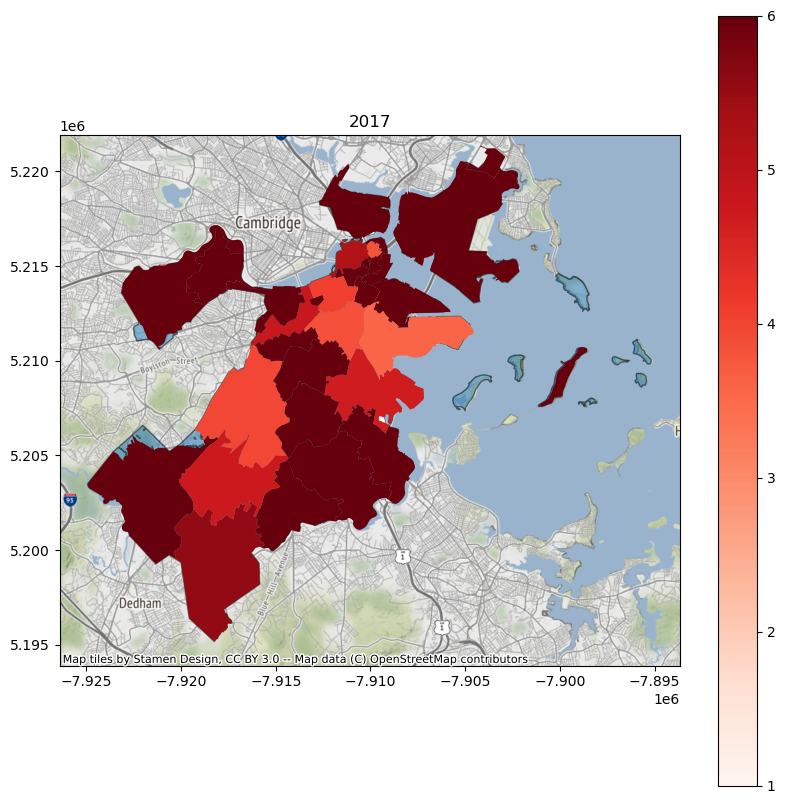

In [13]:
bos = gpd.read_file("boston-Copy1.geojson")
bos = bos.to_crs(epsg=3857)

ax = bos.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# Sea rise
#zips = gpd.read_file("ZIP_Codes.geojson").to_crs(epsg=3857)

#reversed_cmap = plt.cm.get_cmap('Reds').reversed()


zips_17.plot(ax=ax, column='ratio', cmap='Reds', alpha=1, legend=True, vmin=1, vmax=6)
plt.title('2017')

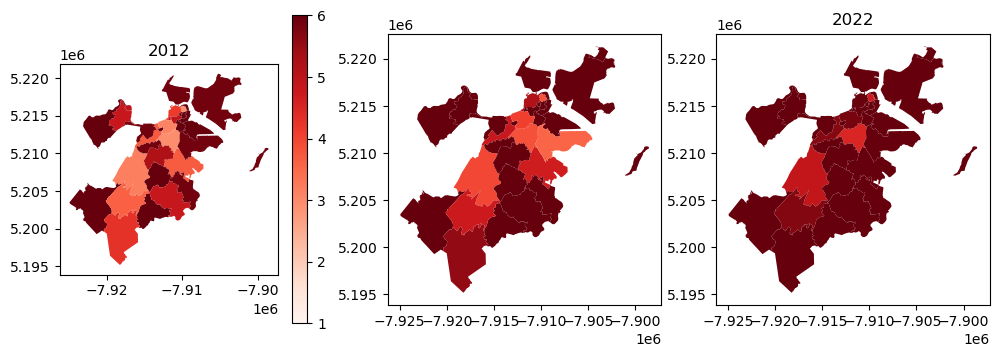

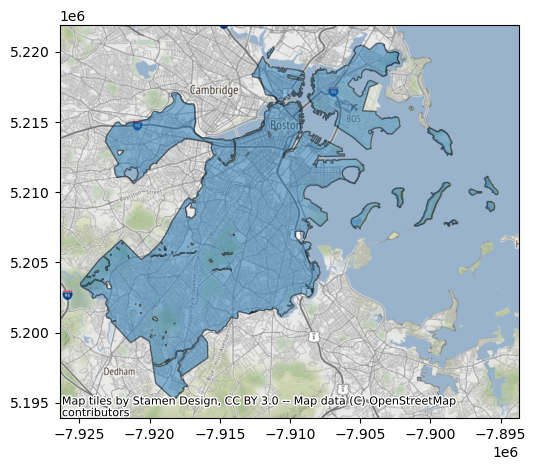

In [29]:
bos = gpd.read_file("boston-Copy1.geojson")
bos = bos.to_crs(epsg=3857)


# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

ax = bos.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# Plot the GeoJSON data in each subplot
zips_12.plot(ax=axs[0], column='ratio', cmap='Reds', alpha=1, legend=True, vmin=1, vmax=6)
axs[0].set_title('2012')

zips_17.plot(ax=axs[1], column='ratio', cmap='Reds', alpha=1, vmin=1, vmax=6)
axs[0].set_title('2012')

zips_22.plot(ax=axs[2], column='ratio', cmap='Reds', alpha=1, vmin=1, vmax=6)
axs[2].set_title('2022')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

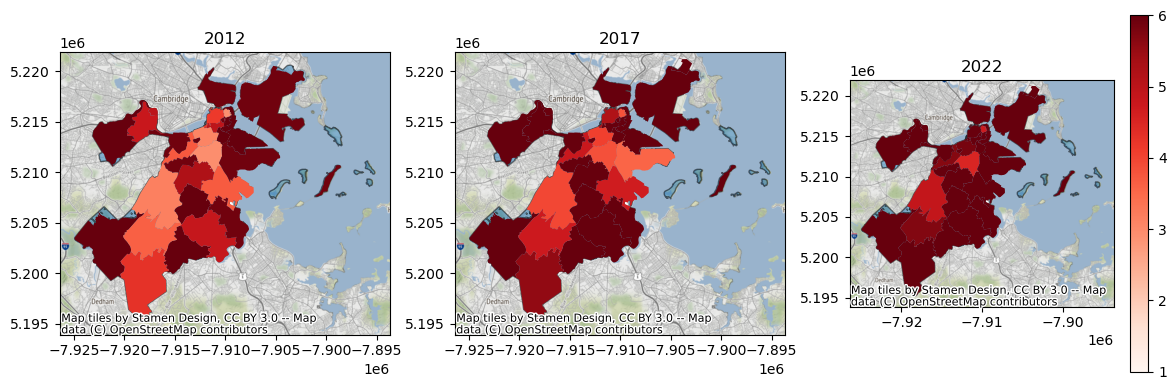

In [35]:
bos = gpd.read_file("boston-Copy1.geojson")
bos = bos.to_crs(epsg=3857)

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Loop over each subplot
for ax in axs:
    bos.plot(ax=ax, figsize=(10, 10), alpha=0.5, edgecolor='k')
    ctx.add_basemap(ax)

# Plot the GeoJSON data in each subplot
zips_12.plot(ax=axs[0], column='ratio', cmap='Reds', alpha=1, vmin=1, vmax=6)
axs[0].set_title('2012')

zips_17.plot(ax=axs[1], column='ratio', cmap='Reds', alpha=1, vmin=1, vmax=6)
axs[1].set_title('2017')

zips_22.plot(ax=axs[2], column='ratio', cmap='Reds', alpha=1, legend=True, vmin=1, vmax=6)
axs[2].set_title('2022')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()